In [ ]:
# importing the dependencies


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Load digits and inspect shapes

In [2]:
digits = load_digits()   # 8x8 images of digits 0–9
X = digits.data          # shape (1797, 64) 
y = digits.target        # shape (1797,) 

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1797, 64)
y shape: (1797,)


In [3]:
# Visualize few digit images with labels

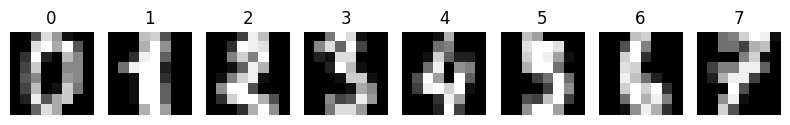

In [4]:
plt.figure(figsize=(8, 2))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(digits.images[i], cmap="gray")
    plt.title(y[i])
    plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
# Train–test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(X_train.shape, X_test.shape)


(1437, 64) (360, 64)


In [6]:
# Feature scaling (StandardScaler)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#Train KNN with K=3 and evaluate 

In [8]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train_scaled, y_train)

y_pred_3 = knn_3.predict(X_test_scaled)
acc_3 = accuracy_score(y_test, y_pred_3)
print("Test accuracy (k=3):", acc_3)


Test accuracy (k=3): 0.9666666666666667


In [9]:
# Try multiple K values and store results

In [10]:
k_values = [3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k={k}, accuracy={acc:.4f}")


k=3, accuracy=0.9667
k=5, accuracy=0.9639
k=7, accuracy=0.9667
k=9, accuracy=0.9639


In [ ]:
# Plot accuracy vs K (deliverable)


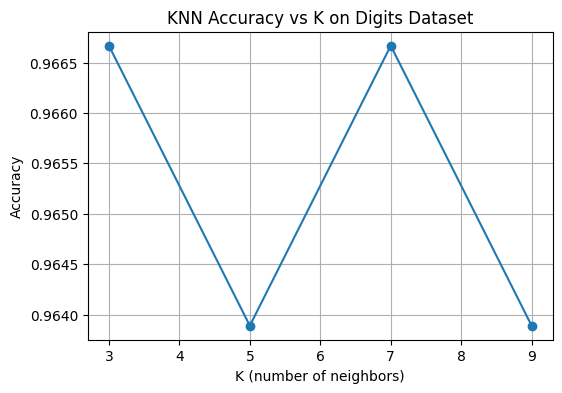

In [11]:
plt.figure(figsize=(6, 4))
plt.plot(k_values, accuracies, marker="o")
plt.xlabel("K (number of neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K on Digits Dataset")
plt.grid(True)
plt.show()


In [ ]:
# Confusion matrix

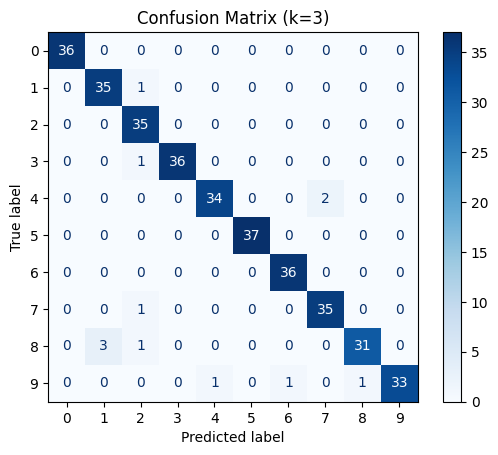

In [12]:
best_k = k_values[int(np.argmax(accuracies))]
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
y_best_pred = best_knn.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_best_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap="Blues", values_format="d")
plt.title(f"Confusion Matrix (k={best_k})")
plt.show()


In [ ]:
# Show 5 test images with predicted labels

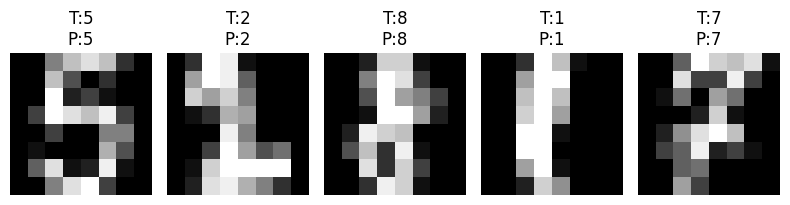

In [13]:
plt.figure(figsize=(8, 2))
for i in range(5):
    idx = i  # or use random indices
    image = X_test[idx].reshape(8, 8)
    true_label = y_test[idx]
    pred_label = y_best_pred[idx]

    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap="gray")
    plt.title(f"T:{true_label}\nP:{pred_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()
